# Multi-Linear Regression

In [4]:
import pandas as pd 

df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/main/Advertising.csv', index_col = 0)

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
X = df[['TV','radio']]
Y = df['sales']

In [6]:
#split into train & test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)

In [7]:
#import algorithm from scikit-learn and train the model
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

model1.fit(xtrain,ytrain)

LinearRegression()

In [8]:
#Evaluate the model performance 
ytrainPred = model1.predict(xtrain)
ytestPred = model1.predict(xtest)

print("Train mean absolute error" , abs(ytrain - ytrainPred).mean())
print("Test mean absolute error" , abs(ytest - ytestPred).mean())


Train mean absolute error 1.171293183935623
Test mean absolute error 1.4745168593977365


In [9]:
#predictions

tv = 76.9
radio = 98.5 

print(model1.predict([[tv,radio]]))

[24.88427146]


C:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# create model2 using all features - (TV, radio & newspaper) and sales as target variable

In [10]:
X = df[['TV','radio','newspaper']]
Y = df['sales']

#split into train & test 
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.75)


#import algorithm from scikit-learn and train the model 
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

model2.fit(xtrain,ytrain)

#Evaluate model performance
ytrainPred = model2.predict(xtrain)
ytestPred = model2.predict(xtest)

print("Train mean absolute error" , abs(ytrain - ytrainPred).mean())
print("Test mean absolute error" , abs(ytest - ytestPred).mean())

Train mean absolute error 1.2010882003352803
Test mean absolute error 1.3165096228199826


In [11]:
#predictions

tv = 76.9
radio = 98.5
newspaper = 106.54

print(model2.predict([[tv,radio,newspaper]]))

[25.88221071]


C:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**feature selection using co-relation matrix**

In [12]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


C:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rohit\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

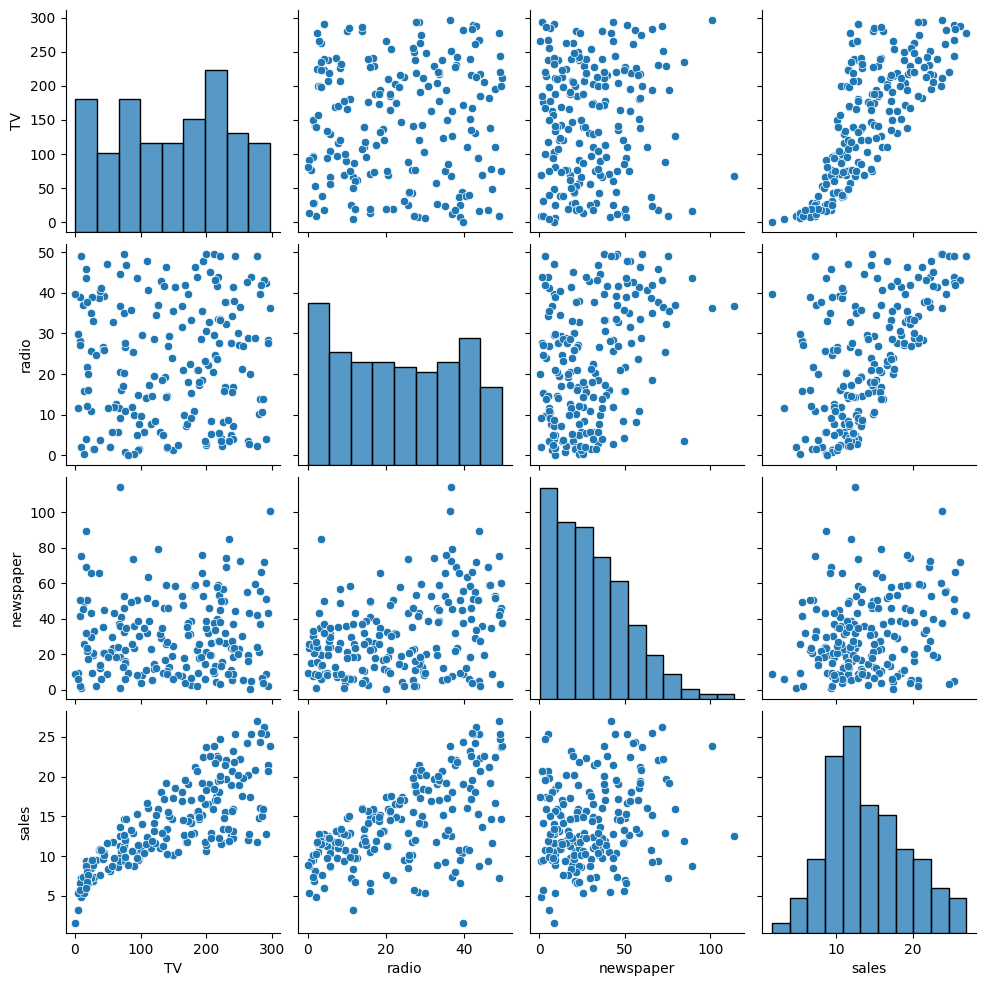

In [13]:
import seaborn as sns
sns.pairplot(df)

# Corelation

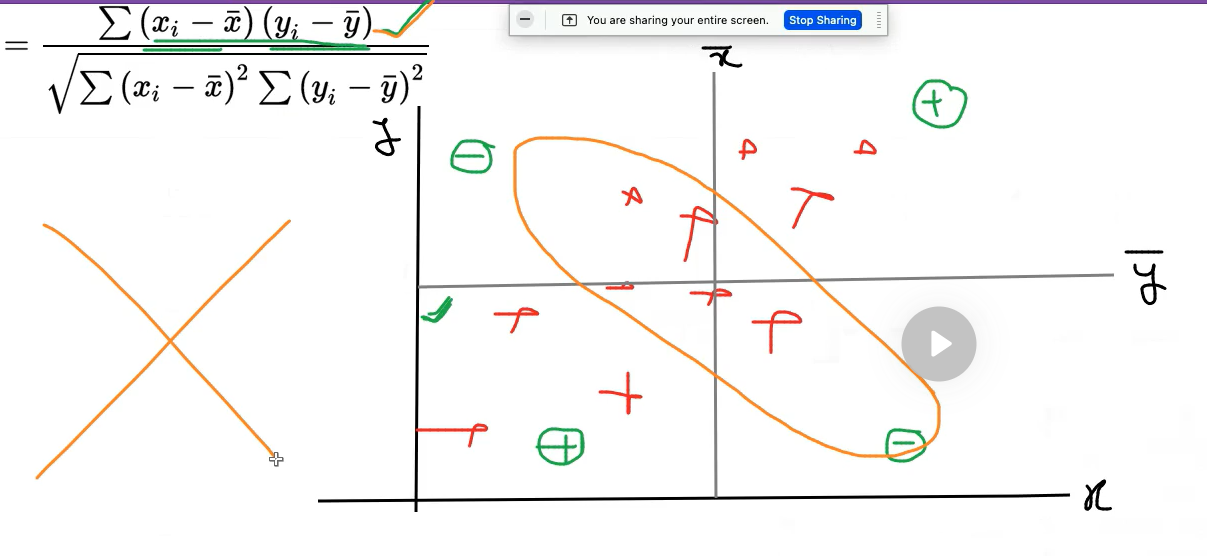

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [15]:
x1 = df.TV
x2 = df.radio
x3 = df.newspaper
yt = df.sales

In [16]:
n1 = ((x1 - x1.mean())*(yt - yt.mean())).sum()
d1 = (((x1 - x1.mean())**2).sum() * ((yt - yt.mean())**2).sum())**0.5

c1 = n1/d1
print(c1)

0.7822244248616064


In [17]:
n2 = ((x2 - x2.mean())*(yt - yt.mean())).sum()
d2 = (((x2 - x2.mean())**2).sum() * ((yt - yt.mean())**2).sum())**0.5

c2 = n2/d2
print(c2)

0.5762225745710552


In [18]:
n3 = ((x3 - x3.mean())*(yt - yt.mean())).sum()
d3 = (((x3 - x3.mean())**2).sum() * ((yt - yt.mean())**2).sum())**0.5

c3 = n3/d3
print(c3)

0.22829902637616534
